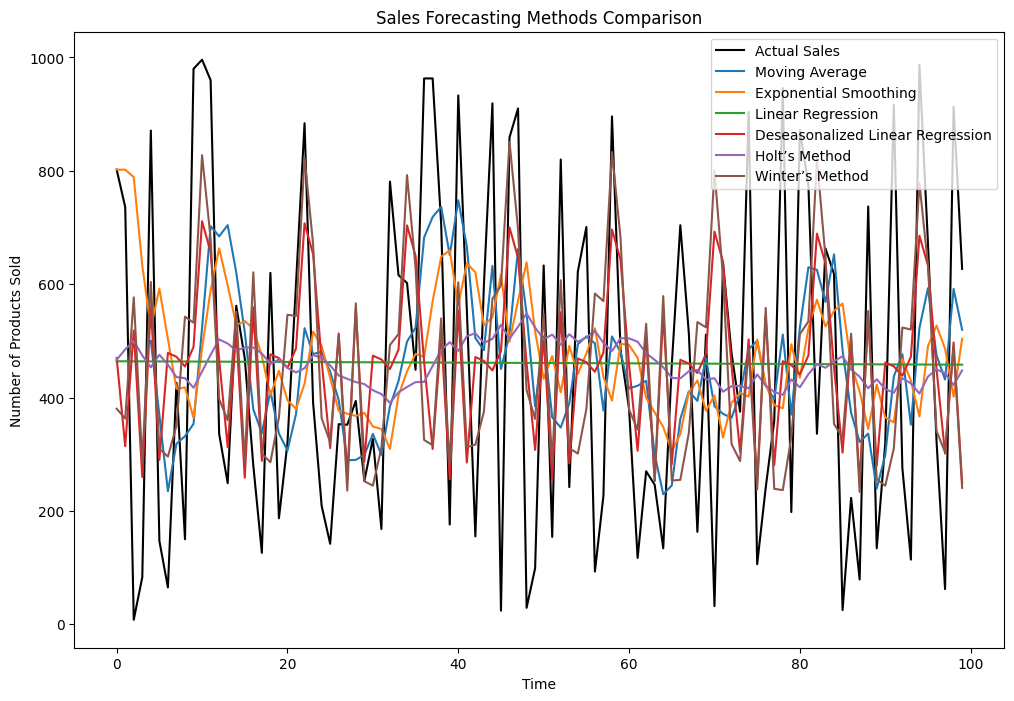

MSE for Moving Average: 69903.38541666667
MSE for Exponential Smoothing: 107724.27102969708
MSE for Linear Regression: 91356.41708844883
MSE for Deseasonalized Linear Regression: 74698.91679920141
MSE for Holt's Method: 97015.91359536069
MSE for Winter's Method: 85434.05234858315


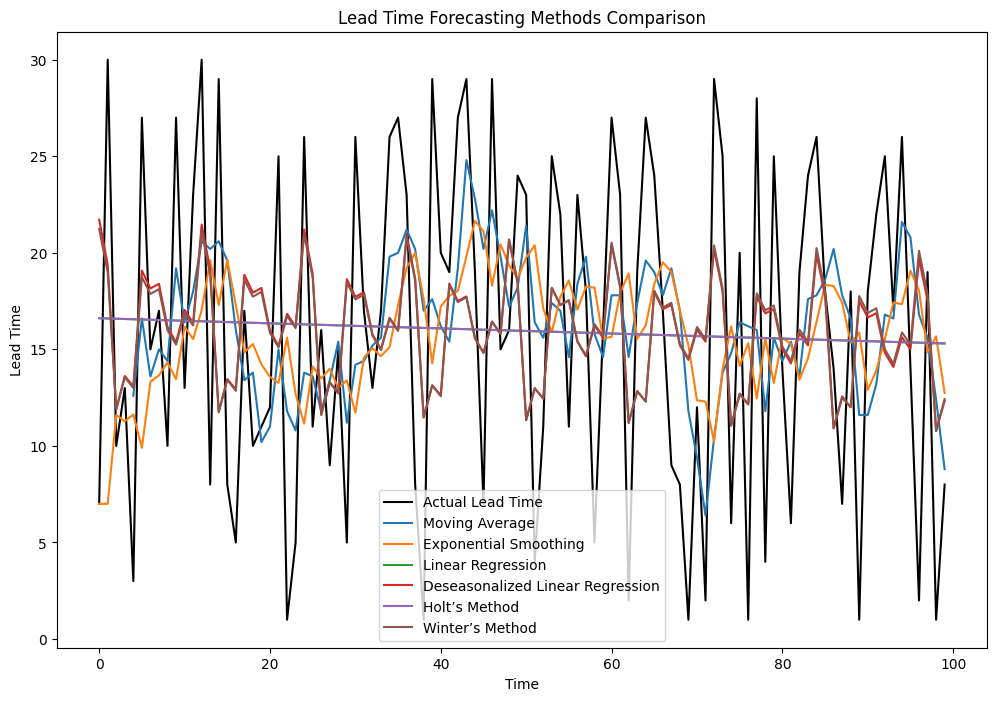

MSE for Moving Average: 61.10166666666667
MSE for Exponential Smoothing: 89.11122617687893
MSE for Linear Regression: 76.27318547854786
MSE for Deseasonalized Linear Regression: 69.2391064331668
MSE for Holt's Method: 76.27318661614937
MSE for Winter's Method: 69.1282591198643


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error

# Load the dataset
data = pd.read_csv('/Users/graydon/Downloads/supply_chain_data.csv')

# Setting the figure for plotting
plt.figure(figsize=(12, 8))

# Plot actual data
plt.plot(data['Number of products sold'], label='Actual Sales', color='black')

# 1. Moving Averages
data['Moving_Average'] = data['Number of products sold'].rolling(
    window=5).mean()
plt.plot(data['Moving_Average'], label='Moving Average')

# 2. Exponential Smoothing
data['Exponential_Smoothing'] = SimpleExpSmoothing(data['Number of products sold']).fit(
    smoothing_level=0.2, optimized=False).fittedvalues
plt.plot(data['Exponential_Smoothing'], label='Exponential Smoothing')

# 3. Linear Regression
X = data.index.values.reshape(-1, 1)  # Using time as the predictor
y = data['Number of products sold']
model_linear = LinearRegression().fit(X, y)
data['Linear_Regression'] = model_linear.predict(X)
plt.plot(data['Linear_Regression'], label='Linear Regression')

# 4. Deseasonalized Linear Regression
# Calculate a seasonal index
seasonal_index = data['Number of products sold'].groupby(
    data.index % 12).mean()
# Repeat the seasonal index to match the length of the dataset
full_seasonal_pattern = np.tile(seasonal_index, len(
    data) // len(seasonal_index) + 1)[:len(data)]
# Deseasonalize the data
deseasonalized = data['Number of products sold'] / full_seasonal_pattern

# Fit linear regression to the deseasonalized data
X = data.index.values.reshape(-1, 1)  # Using time as the predictor
model_deseasonalized = LinearRegression().fit(X, deseasonalized)
# Predict and reseasonalize the output
deseasonalized_prediction = model_deseasonalized.predict(X)
data['Deseasonalized_Linear_Regression'] = deseasonalized_prediction * \
    full_seasonal_pattern

plt.plot(data.index, data['Deseasonalized_Linear_Regression'],
         label='Deseasonalized Linear Regression')


# 5. Holt’s Method
data['Holts_Method'] = ExponentialSmoothing(
    data['Number of products sold'], trend='add').fit().fittedvalues
plt.plot(data['Holts_Method'], label='Holt’s Method')

# 6. Winter’s Method
data['Winters_Method'] = ExponentialSmoothing(
    data['Number of products sold'], trend='add', seasonal='add', seasonal_periods=12).fit().fittedvalues
plt.plot(data['Winters_Method'], label='Winter’s Method')

# Add legend and labels
plt.legend()
plt.title('Sales Forecasting Methods Comparison')
plt.xlabel('Time')
plt.ylabel('Number of Products Sold')

# Show the plot
plt.show()

# Save the dataframe with all the forecasts
data.to_csv('forecasted_data.csv', index=False)

# Calculate MSE for each method, aligning actual and forecasted data to ensure equal length
mse_moving_average = mean_squared_error(data['Number of products sold'][data['Moving_Average'].notna()], data['Moving_Average'].dropna())
mse_exponential_smoothing = mean_squared_error(data['Number of products sold'][data['Exponential_Smoothing'].notna()], data['Exponential_Smoothing'].dropna())
mse_linear_regression = mean_squared_error(data['Number of products sold'], data['Linear_Regression'])  # Linear regression should not have NaN
mse_deseasonalized_linear_regression = mean_squared_error(data['Number of products sold'], data['Deseasonalized_Linear_Regression'])  # Assuming no NaN after reseasonalizing
mse_holts_method = mean_squared_error(data['Number of products sold'][data['Holts_Method'].notna()], data['Holts_Method'].dropna())
mse_winters_method = mean_squared_error(data['Number of products sold'][data['Winters_Method'].notna()], data['Winters_Method'].dropna())

# Print the MSE for each method
print(f"MSE for Moving Average: {mse_moving_average}")
print(f"MSE for Exponential Smoothing: {mse_exponential_smoothing}")
print(f"MSE for Linear Regression: {mse_linear_regression}")
print(f"MSE for Deseasonalized Linear Regression: {mse_deseasonalized_linear_regression}")
print(f"MSE for Holt's Method: {mse_holts_method}")
print(f"MSE for Winter's Method: {mse_winters_method}")

#-------------------
#Lead times forecast

# Load the dataset
data = pd.read_csv('/Users/graydon/Downloads/supply_chain_data.csv')

# Setting the figure for plotting
plt.figure(figsize=(12, 8))

# Assuming 'lead_time' is the column with lead times
# Plot actual data
plt.plot(data['Lead times'], label='Actual Lead Time', color='black')

# 1. Moving Averages
data['Moving_Average'] = data['Lead times'].rolling(window=5).mean()
plt.plot(data['Moving_Average'], label='Moving Average')

# 2. Exponential Smoothing
data['Exponential_Smoothing'] = SimpleExpSmoothing(data['Lead times']).fit(
    smoothing_level=0.2, optimized=False).fittedvalues
plt.plot(data['Exponential_Smoothing'], label='Exponential Smoothing')

# 3. Linear Regression
X = data.index.values.reshape(-1, 1)  # Using time as the predictor
y = data['Lead times']
model_linear = LinearRegression().fit(X, y)
data['Linear_Regression'] = model_linear.predict(X)
plt.plot(data['Linear_Regression'], label='Linear Regression')

# 4. Deseasonalized Linear Regression
# Calculate a seasonal index
seasonal_index = data['Lead times'].groupby(data.index % 12).mean()
# Repeat the seasonal index to match the length of the dataset
full_seasonal_pattern = np.tile(seasonal_index, len(data) // len(seasonal_index) + 1)[:len(data)]
# Deseasonalize the data
deseasonalized = data['Lead times'] / full_seasonal_pattern

# Fit linear regression to the deseasonalized data
model_deseasonalized = LinearRegression().fit(X, deseasonalized)
# Predict and reseasonalize the output
deseasonalized_prediction = model_deseasonalized.predict(X)
data['Deseasonalized_Linear_Regression'] = deseasonalized_prediction * full_seasonal_pattern

plt.plot(data.index, data['Deseasonalized_Linear_Regression'], label='Deseasonalized Linear Regression')

# 5. Holt’s Method
data['Holts_Method'] = ExponentialSmoothing(data['Lead times'], trend='add').fit().fittedvalues
plt.plot(data['Holts_Method'], label='Holt’s Method')

# 6. Winter’s Method
data['Winters_Method'] = ExponentialSmoothing(data['Lead times'], trend='add', seasonal='add', seasonal_periods=12).fit().fittedvalues
plt.plot(data['Winters_Method'], label='Winter’s Method')

# Add legend and labels
plt.legend()
plt.title('Lead Time Forecasting Methods Comparison')
plt.xlabel('Time')
plt.ylabel('Lead Time')

# Show the plot
plt.show()

# Calculate MSE for each method, aligning actual and forecasted data to ensure equal length
mse_moving_average = mean_squared_error(data['Lead times'][data['Moving_Average'].notna()], data['Moving_Average'].dropna())
mse_exponential_smoothing = mean_squared_error(data['Lead times'][data['Exponential_Smoothing'].notna()], data['Exponential_Smoothing'].dropna())
mse_linear_regression = mean_squared_error(data['Lead times'], data['Linear_Regression'])  # Linear regression should not have NaN
mse_deseasonalized_linear_regression = mean_squared_error(data['Lead times'], data['Deseasonalized_Linear_Regression'])  # Assuming no NaN after reseasonalizing
mse_holts_method = mean_squared_error(data['Lead times'][data['Holts_Method'].notna()], data['Holts_Method'].dropna())
mse_winters_method = mean_squared_error(data['Lead times'][data['Winters_Method'].notna()], data['Winters_Method'].dropna())

# Print the MSE for each method
print(f"MSE for Moving Average: {mse_moving_average}")
print(f"MSE for Exponential Smoothing: {mse_exponential_smoothing}")
print(f"MSE for Linear Regression: {mse_linear_regression}")
print(f"MSE for Deseasonalized Linear Regression: {mse_deseasonalized_linear_regression}")
print(f"MSE for Holt's Method: {mse_holts_method}")
print(f"MSE for Winter's Method: {mse_winters_method}")
